https://unit8co.github.io/darts/quickstart/00-quickstart.html#Training-forecasting-models-and-making-predictions

In [73]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import plotly.express as px
import matplotlib.pyplot as plt
from darts.models import ExponentialSmoothing


# Generate data
N = 365
P = 20
start_date = pd.to_datetime('2024-01-01')
dates = pd.date_range(start=start_date, periods=N, freq='D')
values = [30 * np.sin(2 * np.pi * i / 100) + 10 * np.random.randn() for i, _ in enumerate(dates)]

# Create DataFrame
df = pd.DataFrame({'date': dates, 'value': values})

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [74]:
from darts import TimeSeries

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "date", "value")

train_size = int(len(df) * 0.8)
train, val = series[:train_size], series[train_size:]

In [75]:

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

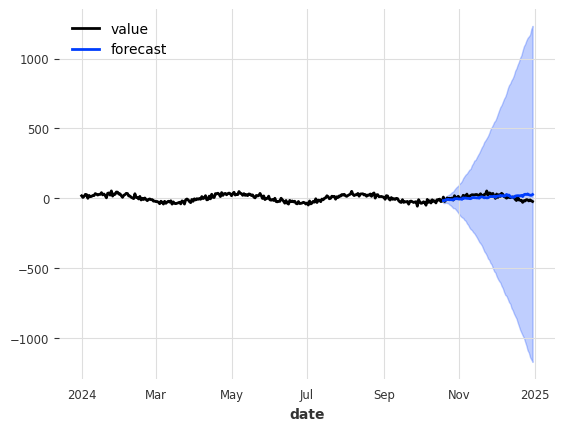

In [76]:

series.plot()
prediction.plot(label="forecast")
plt.legend()

In [77]:
from darts.metrics import mape



model ExponentialSmoothing() obtains MAPE: 384.38%


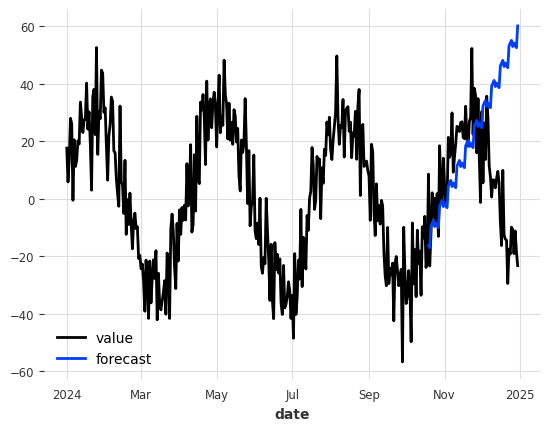

model TBATS() obtains MAPE: 206.26%


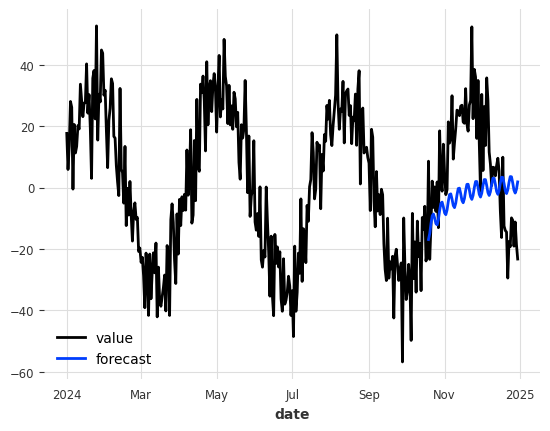

model AutoARIMA() obtains MAPE: 167.24%


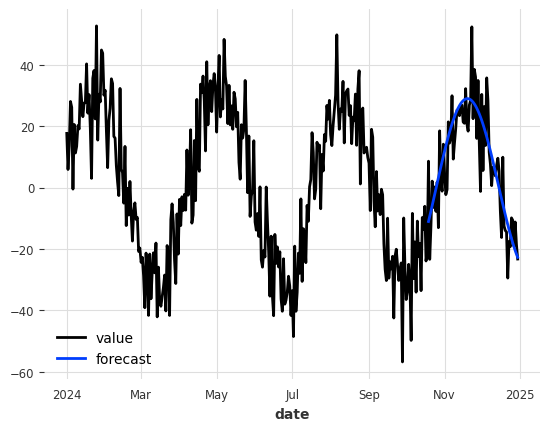

In [78]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print(f"model {model} obtains MAPE: {mape(val, forecast):.2f}%")
    series.plot()
    forecast.plot(label="forecast")
    plt.show()

eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())


In [79]:
prediction

<TimeSeries (DataArray) (date: 73, component: 1, sample: 1000)> Size: 584kB
array([[[   2.85622777,  -11.96441566,   -5.67731987, ...,
          -15.28915572,  -28.78309861,  -20.20410213]],

       [[  -3.59979119,   -5.64797536,  -17.51494082, ...,
          -14.90413453,  -34.22828149,  -32.76317412]],

       [[ -12.7096703 ,  -21.80488595,   -4.57000353, ...,
          -10.28261476,  -34.59769325,  -18.05165221]],

       ...,

       [[ 373.68261512, -624.39514277,  114.01620577, ...,
          640.62680897,  -58.6954629 , -632.61595909]],

       [[ 371.51305574, -679.79190347,  145.1679855 , ...,
          630.95804004,  -46.78482324, -666.14796955]],

       [[ 374.00618498, -700.331193  ,  140.50063029, ...,
          653.35253306,  -33.22601962, -673.10165841]]])
Coordinates:
  * date       (date) datetime64[ns] 584B 2024-10-19 2024-10-20 ... 2024-12-30
  * component  (component) object 8B 'value'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [80]:
prediction.values().squeeze()

array([  2.85622777,  -3.59979119, -12.7096703 ,  20.66390636,
        19.28806329,  21.39282837,  49.0205728 ,  35.75037872,
        60.50753752,  86.91424609,  88.39977625, 106.65462351,
       129.03534006, 131.77482203, 144.37225738, 190.72649948,
       174.48794584, 200.94757293, 221.24693122, 247.39495588,
       257.05719101, 259.79530976, 274.34308561, 304.0998627 ,
       313.91093975, 334.30160788, 347.71479639, 368.19260889,
       366.6052855 , 399.71516116, 418.62861975, 424.09000642,
       452.59086244, 448.10635536, 463.05017736, 486.90303187,
       490.46918303, 498.49709549, 515.93581233, 519.01272041,
       508.67629636, 514.45196974, 513.27302618, 504.43044735,
       501.25794613, 512.9551573 , 500.29324176, 502.54107149,
       481.44128841, 463.7938039 , 466.28438575, 465.82050841,
       468.04670672, 457.68631116, 442.53941856, 435.50401744,
       434.10687632, 433.95160828, 425.88890291, 442.71600848,
       415.56362173, 435.3239224 , 424.09290855, 426.48

In [81]:
prediction.data_array()['date'].values

array(['2024-10-19T00:00:00.000000000', '2024-10-20T00:00:00.000000000',
       '2024-10-21T00:00:00.000000000', '2024-10-22T00:00:00.000000000',
       '2024-10-23T00:00:00.000000000', '2024-10-24T00:00:00.000000000',
       '2024-10-25T00:00:00.000000000', '2024-10-26T00:00:00.000000000',
       '2024-10-27T00:00:00.000000000', '2024-10-28T00:00:00.000000000',
       '2024-10-29T00:00:00.000000000', '2024-10-30T00:00:00.000000000',
       '2024-10-31T00:00:00.000000000', '2024-11-01T00:00:00.000000000',
       '2024-11-02T00:00:00.000000000', '2024-11-03T00:00:00.000000000',
       '2024-11-04T00:00:00.000000000', '2024-11-05T00:00:00.000000000',
       '2024-11-06T00:00:00.000000000', '2024-11-07T00:00:00.000000000',
       '2024-11-08T00:00:00.000000000', '2024-11-09T00:00:00.000000000',
       '2024-11-10T00:00:00.000000000', '2024-11-11T00:00:00.000000000',
       '2024-11-12T00:00:00.000000000', '2024-11-13T00:00:00.000000000',
       '2024-11-14T00:00:00.000000000', '2024-11-15

In [82]:
fig = px.line(series.pd_dataframe())
fig.add_scatter(x=prediction.data_array()['date'].values, y=prediction.values().squeeze(), name="predicted")
fig.show()
